### SVD/PCA brainstorm

1. Optimize: <br>
    -$min_W,H ||V - WH||^2$ <br>
    -s.t. $W^T W = I$ <br>
    -restrict W to singular vectors of V: Looking for eigenvectors, <br>
    -find best possible basis to represent V <br>
    -V is an orthongonal matrix <br>
    -can be non-negative <br>
    -best possible matrix approximation for k <br>
    -great for compression/filter out noise <br>
    -violates non-negativety: bad for data analysis <br>
    -basis vectors usually not interpretable big disadvantage in DS<br>
    -PCA for any rank K will give most optimal data representation <br>
    -does not mean it is optimal for interpretation <br>
    -cannot assign any meaning to the basis vectors <br>
    
2. matrix factorization:
    -extreme case reconstructing a matrix using the outer product of two
    vectors: this would not be able to reconstruct the matrix exactly
    -if we had a vector with the relative frequency of each vocab word
    out of the total word count and another with the average words per
    document, then the outer product would be close to approx the matrix
    -if you increase it to two rows then you can have two clusters
3. SVD:
    -we expect word that appear more frequently in one topic to not
    appear as frequently in another
    -we expect the topics to be orthogonal
    -SVD factorizaes a matrix into on ematrix w/orthogonal columsn and
    one with orthoganl rows, along with a diag matirx which contains
    the relative importance of each factor
4. Truncated SVD
    -Just interested in the vectors corresponding to the largest singular values
    -Randomized SVD
    -Not every matrix has an eigen decomposition, any matrix has a SVD
    -SVD is a generalization of the eigendecomposition

Machine Epsilon
https://en.wikipedia.org/wiki/Machine_epsilon
    
QR algorithm
-let's us find all the eigenvalues
-QR algorithm v. QR decomposition:
    -QR decomposition decomposes a matrix $A = QR$ into a set of orthonormal columns $Q$
    and triangle matrix $R$
-QR algorithm uses QR decomposition
-Linear algebra
    -two matrices are simliar if there exists a non-singular matrix X such that 
    $B = X^-1AX$
    -If X is non-singular then $A$ and $X^-1$ have the same eigenvalues
    -Schur factoriation of a matrix $A$ is a factorization $A = QTQ$
    -Every square matrix has a Schur factorization
    
most basic QR algorithm
    Q,R = A   # get the decomposition for A from previous iteration
    A = R @ Q # new A to R x Q
    
converges to the Schur form of A (return something triangular
Key: the QR algorithm constructs orthonormal bases for successive powers of A. And remeber the close relationship between powers of A and the eigen decomposition

Rayleigh quotients

In [87]:
n = 3
A = np.random.rand(n,n)
AT = A @ A.T

In [88]:
def pure_qr(A, max_iter=50000):
    Ak = np.copy(A) # copy of A can do in place
    n = A.shape[0] # inti
    QQ = np.eye(n) # intialize Q to be the identify
    for k in range(max_iter):
        Q, R = np.linalg.qr(Ak) # QR factorization using np.lin
        Ak = R @ Q
        QQ = QQ @ Q # running total of what happens when you mult Q*Q
        if k % 10000 == 0:
            print(Ak)
            print("\n")
            
    return Ak, QQ

In [89]:
Ak, Q = pure_qr(A) # approaches triangular matrix

[[ 1.61620451  0.17571725 -0.2760327 ]
 [ 0.08899736 -0.50693765  0.00870006]
 [ 0.01822226 -0.02387941 -0.01754127]]


[[ 1.62066038 -0.07116801 -0.29666138]
 [ 0.         -0.51325018 -0.04576984]
 [ 0.          0.         -0.01568462]]


[[ 1.62066038 -0.07116801 -0.29666138]
 [ 0.         -0.51325018 -0.04576984]
 [ 0.          0.         -0.01568462]]


[[ 1.62066038 -0.07116801 -0.29666138]
 [ 0.         -0.51325018 -0.04576984]
 [ 0.          0.         -0.01568462]]


[[ 1.62066038 -0.07116801 -0.29666138]
 [ 0.         -0.51325018 -0.04576984]
 [ 0.          0.         -0.01568462]]




In [91]:
np.linalg.eigvals(A) # look at the eignencalues in the triangular matrix

array([ 1.62066038, -0.01568462, -0.51325018])

In [93]:
np.allclose(np.eye(n), Q @ Q.T), np.allclose(np.eye(n), Q.T @ Q)

(True, True)

if you start with a hessenberg form its faster --> use a phase I matrix to get to phase II QR matrix

In [95]:
# gram-schmidt

def cgs(A):
    # get the shape in the form (m,n)
    m,n = A.shape
    # make two matrices filled with zeros
    # Q = m x n and R = n x n
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    
    # loop n times 
    for j in range(n):
        # set v = to a row in range(n)
        v = A[:,j]
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], A[:,j])
            v -= (R[i,j] * Q[:,i])
        R[j,j] = np.linalg.norm(v)
        Q[:,j] = v / R[j,j]
    return Q,R

In [132]:
A[:,0]

array([0.55358825, 0.53282953, 0.15715451, 0.90613389, 0.72968549])

In [145]:
A[:,0]

array([0.55358825, 0.53282953, 0.15715451, 0.90613389, 0.72968549])

In [158]:
# j = 1, i = 0
print(A[:,1])
print(Q[:,0])
print(np.dot(Q[:,0], A[:,1]))
RX = np.zeros([n,n], dtype=np.float64)
RX[0,1] = np.dot(Q[:,0], A[:,1])
print('')
print(RX[0,1])
print('')
print(RX[0,1] * Q[:,1])

[ 0.10926229 -0.24561691  0.13568     0.24442427 -0.23629114]
[0. 0. 0. 0. 0.]
0.0

0.0

[0. 0. 0. 0. 0.]


In [182]:
vectors = np.array([
    [1, 1, 2, 0, 1, 1],
    [0, 0, 0, 1, 2, 1],
    [1, 2, 3, 1, 3, 2],
    [1, 0, 1, 0, 1, 1]
], dtype=float)

np.zeros(vectors.shape)[:, :6]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
def gram_schmidt(X):
    # a
    O = np.zeros(X.shape) # vector space (the ground)
    
    # loop from 0 to the n dimension (6 in this case)
    for i in range(X.shape[1]):
        # orthogonalization
        # b
        vector = X[:, i] # grab a column
        # c
        space = O[:, :i] # grab a column and then next iteration grab another one plus previous one
        # d
        projection = vector @ space # dot product of vector * space
        # e
        vector = vector - np.sum(projection * space, axis=1)
        
        # normalization
        # we are getting the magnitude - the euclidean distance L2 norm etc..
        # but I don't think he is doing it here tho...
        norm = np.sqrt(vector @ vector)
        # g
        vector /= abs(norm) < 1e-8 and 1 or norm
        
        # h
        O[:, i] = vector 
    
    return 0

In [184]:
# input X
X = np.array([
    [1, 1, 2, 0, 1, 1],
    [0, 0, 0, 1, 2, 1],
    [1, 2, 3, 1, 3, 2],
    [1, 0, 1, 0, 1, 1]
], dtype=float)

# creat the vector space (the ground)
O = np.zeros(X.shape); O

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [187]:
# take a peak at X
X

array([[1., 1., 2., 0., 1., 1.],
       [0., 0., 0., 1., 2., 1.],
       [1., 2., 3., 1., 3., 2.],
       [1., 0., 1., 0., 1., 1.]])

In [188]:
# grab a column - first column in this case & name it vector
vector = X[:, 0]
vector

array([1., 0., 1., 1.])

In [190]:
# grab a column - we will grab a new col + each previous col 
# during each successive iteration
# name this space 

space = O[:, :0]
space

array([], shape=(4, 0), dtype=float64)

In [193]:
# multiply vector by space
# in the first iteration it does nothing

projection = vector @ space
projection

array([], dtype=float64)

In [197]:
# subtract the vector from the sum of projection * space
# set to vector for the next iteration

vector = vector - np.sum(projection * space, axis=1)

vector

array([1., 0., 1., 1.])

In [200]:
# normalize

norm = np.sqrt(vector @ vector)
norm

1.7320508075688772

In [213]:
# divide the vector by the norm scalar

vector /= abs(norm) < 1e-8 and 1 or norm 

# see if abs value < some values

In [214]:
vector

array([0.57735027, 0.        , 0.57735027, 0.57735027])

In [216]:
# make the first column of O equal to the vector

O[:, 0] = vector
O[:, 0]

array([0.57735027, 0.        , 0.57735027, 0.57735027])

In [217]:
# iteration 2a
# grab a column - first column in this case & name it vector

vector = X[:, 1]
vector

array([1., 0., 2., 0.])

In [220]:
# iteration 2b
# grab a column - we will grab a new col + each previous col 
# during each successive iteration
# name this space 
# on the second iteration it will be the first column

space = O[:, :1]
space

array([[0.57735027],
       [0.        ],
       [0.57735027],
       [0.57735027]])

In [221]:
# iteration 2c
# multiply vector by space
# in the first iteration it does nothing

projection = vector @ space
projection

array([1.73205081])

In [222]:
# iteration 2d
# subtract the vector from the sum of projection * space
# set to vector for the next iteration

vector = vector - np.sum(projection * space, axis=1)

vector

array([-2.22044605e-16,  0.00000000e+00,  1.00000000e+00, -1.00000000e+00])

In [223]:
# iteration 2e
# normalize

norm = np.sqrt(vector @ vector)
norm

1.4142135623730951

In [224]:
# iteration 2f
# divide the vector by the norm scalar if less than some values?

vector /= abs(norm) < 1e-8 and 1 or norm 

# see if abs value < some values

vector

array([-1.57009246e-16,  0.00000000e+00,  7.07106781e-01, -7.07106781e-01])

In [226]:
# iteration 2a
# make the first column of O equal to the vector

O[:, 1] = vector
O[:, 1]

array([-1.57009246e-16,  0.00000000e+00,  7.07106781e-01, -7.07106781e-01])

In [227]:
# iteration 3
# grab a column - first column in this case & name it vector

vector = X[:, 2]
vector

array([2., 0., 3., 1.])

In [228]:
# iteration 3
# grab a column - we will grab a new col + each previous col 
# during each successive iteration
# name this space 
# on the second iteration it will be the first column

space = O[:, :2]
space

array([[-1.57009246e-16, -1.57009246e-16],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 7.07106781e-01,  7.07106781e-01],
       [-7.07106781e-01, -7.07106781e-01]])

In [249]:
np.linalg.norm(np.array([[3,4]]))

5.0

In [238]:
25 * 2080

52000

In [248]:
np.linalg.norm(np.array([52000,52]))

52000.0259999935

In [233]:
# L2 NORM = hypotenuse
(1**2 + 1**2)**(1/2)

1.4142135623730951

In [140]:
m,n = A.shape
Q = np.zeros([m,n], dtype=np.float64)
R = np.zeros([n,n], dtype=np.float64)

# come up with a factorization - in QR factorizatoin

# 34:00 m - youtube
# create orthonormal columns of Q that will represent A
# take the first column of A and have it normalized (first column of Q)
# to find the second column of A you need to find
# for each j calculate a single projection (v_j = P_j*a_j)
# where P_j projects onto the space orthogonal to the span of q_1...q_j-1 (previous q's)

# first column of Q is A normalized
# second column of Q: take the second column of A, project it onto the first col of Q, subtract that off and that 
# will be your second column of Q once you normalize 
# each time you are going through and you want to subtract everything off that has been accounted for 
# as you are doing this you are creating these orthonormal columns of Q that represent your columns of A

# the gram-schmidt process is like staring at a column at high noon
# the column is the vector you are inputting to GS
# the floor is vector space
# the shadow is the projection
# perpendicular is orthoganol
# pushing it over until the shadow disppears is the gram-schmidt process
# norms quantify vector magnitude




for x,j in enumerate(range(n)):
    v = A[:,j] # single projection a vector
    print(f'j: {j} {v}')
    print('')
    #print(x, v)
    for i in range(j):
        print(f'dot product: {np.dot(Q[:,i], A[:,j])}')
        R[i,j] = np.dot(Q[:,i], A[:,j])
        print(f'second R: {R[i,j]}')
        v -= (R[i,j] * Q[:,i])
        print(f'v: {v}')
        print('-------')

j: 0 [0.55358825 0.53282953 0.15715451 0.90613389 0.72968549]

j: 1 [ 0.10926229 -0.24561691  0.13568     0.24442427 -0.23629114]

dot product: 0.0
second R: 0.0
v: [ 0.10926229 -0.24561691  0.13568     0.24442427 -0.23629114]
-------
j: 2 [ 0.04011892 -0.06876398  0.70610188 -0.27579636  0.21018843]

dot product: 0.0
second R: 0.0
v: [ 0.04011892 -0.06876398  0.70610188 -0.27579636  0.21018843]
-------
dot product: 0.0
second R: 0.0
v: [ 0.04011892 -0.06876398  0.70610188 -0.27579636  0.21018843]
-------
j: 3 [ 0.37329205  0.34310608  0.04525292 -0.16933323 -0.33321242]

dot product: 0.0
second R: 0.0
v: [ 0.37329205  0.34310608  0.04525292 -0.16933323 -0.33321242]
-------
dot product: 0.0
second R: 0.0
v: [ 0.37329205  0.34310608  0.04525292 -0.16933323 -0.33321242]
-------
dot product: 0.0
second R: 0.0
v: [ 0.37329205  0.34310608  0.04525292 -0.16933323 -0.33321242]
-------
j: 4 [ 0.24119826 -0.18678295 -0.11310704 -0.11553114  0.12123157]

dot product: 0.0
second R: 0.0
v: [ 0.241

In [159]:
n = 5
A = np.random.rand(n,n)

Q,R = cgs(A)

In [160]:
np.allclose(A, Q @ R)

False

In [ ]:
# practical QE (QR w/shifts)

In [ ]:
# power iteration

# start with a vector b, which maybe an approximation to the dominant eigenvector
# or a random vector
# start with random numbers for b

b_k = np.random.rand(A.shape[1])



In [ ]:
# calculate the matrix by vector product Ab - the norm is the max of the resulting vector
# looking to find the Eigenpair (Eigenvalue + Eigenvector)
# will find the dominant eingenvalue
b_kl_norm = np.linalg.norm(b_kl)

In [ ]:
# renormalize the vector
b_k = b_kl / b_kl_norm

In [30]:
# 
import numpy as np

A = np.array([[0,1],[1,1]])
b = np.array([1,1])

In [31]:
# mutliply A*b

Ab = A.dot(b)
Ab

array([1, 2])

In [32]:
# normalize using vector max norm L^inf
from numpy import inf

Ab_norm = np.linalg.norm(Ab, inf)
Ab_norm

2.0

In [33]:
# find b2
b2 = 0.5 * Ab
b2

array([0.5, 1. ])

In [34]:
# restart

Ab2 = np.linalg.norm(A.dot(b2), inf)
Ab2

1.5

In [38]:
0.666 * A.dot(b2)

array([0.666, 0.999])

In [44]:
np.array([1,2]) * 1/2

array([0.5, 1. ])

In [69]:
# how does this converge
A = np.array([[0,1],[1,0]])
b = np.array([-1,1])
eigenvalue = []

for i,x in enumerate(range(100)):
    print(i)
    Ab = A.dot(b)
    Ab_norm = np.linalg.norm(Ab, inf)
    print(f'eigenvalue: {Ab_norm}')
    b_i = (1/Ab_norm) * Ab
    print(f'eigenvector: {b_i}')
    print('')
    b = b_i
    eigenvalue.append(Ab_norm)
    

0
eigenvalue: 1.0
eigenvector: [ 1. -1.]

1
eigenvalue: 1.0
eigenvector: [-1.  1.]

2
eigenvalue: 1.0
eigenvector: [ 1. -1.]

3
eigenvalue: 1.0
eigenvector: [-1.  1.]

4
eigenvalue: 1.0
eigenvector: [ 1. -1.]

5
eigenvalue: 1.0
eigenvector: [-1.  1.]

6
eigenvalue: 1.0
eigenvector: [ 1. -1.]

7
eigenvalue: 1.0
eigenvector: [-1.  1.]

8
eigenvalue: 1.0
eigenvector: [ 1. -1.]

9
eigenvalue: 1.0
eigenvector: [-1.  1.]

10
eigenvalue: 1.0
eigenvector: [ 1. -1.]

11
eigenvalue: 1.0
eigenvector: [-1.  1.]

12
eigenvalue: 1.0
eigenvector: [ 1. -1.]

13
eigenvalue: 1.0
eigenvector: [-1.  1.]

14
eigenvalue: 1.0
eigenvector: [ 1. -1.]

15
eigenvalue: 1.0
eigenvector: [-1.  1.]

16
eigenvalue: 1.0
eigenvector: [ 1. -1.]

17
eigenvalue: 1.0
eigenvector: [-1.  1.]

18
eigenvalue: 1.0
eigenvector: [ 1. -1.]

19
eigenvalue: 1.0
eigenvector: [-1.  1.]

20
eigenvalue: 1.0
eigenvector: [ 1. -1.]

21
eigenvalue: 1.0
eigenvector: [-1.  1.]

22
eigenvalue: 1.0
eigenvector: [ 1. -1.]

23
eigenvalue: 1.0
ei

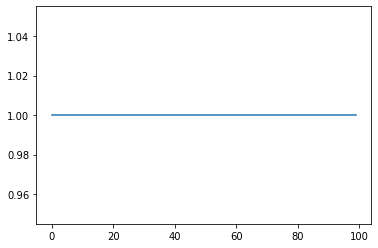

In [70]:
import matplotlib.pyplot as plt
plt.plot(eigenvalue)
plt.show()